## 3.5 sampling by grid

### Because the grid can clearly allow users to see the final result, use data that has not been preprocessed (removed by some walk route) here.

In [1]:
#packages
import warnings
warnings.filterwarnings("ignore")
import gnssmapper as gm
import copy
import pandas as pd
from pandas import DataFrame
import numpy as np
import geopandas as gpd
import math
from math import cos,sin
import shapely
from shapely.geometry import Point,Polygon,shape
from shapely.geometry import mapping
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import os

import gnss_process
import sampling

## read collected raw data by files

In [2]:
path = r'/Users/jyjy/Desktop/data'
filenames =os.listdir(path)

for name in filenames:
    #ignore .txt in filenames
    filenames[filenames.index(name)]=name[:-4]
filenames_sort = sorted(filenames)

In [3]:
#day data
names1 = filenames_sort[0:25]
#night data
names2 = filenames_sort[25:]

In [4]:
daydata = [gm.read_gnsslogger(r'/Users/jyjy/Desktop/data/'+name+'.txt') for name in names1]
nightdata = [gm.read_gnsslogger(r'/Users/jyjy/Desktop/data/'+name+'.txt') for name in names2]

In [5]:
daydata = pd.concat(daydata,axis=0)
nightdata = pd.concat(nightdata,axis=0)

In [6]:
len(daydata)

32280

In [7]:
len(nightdata)

40155

In [8]:
#change date form
daydata = gnss_process.time_form(daydata)
nightdata = gnss_process.time_form(nightdata)

In [9]:
#remove invalid satellites
daydata = gnss_process.valid_svid(daydata)
nightdata = gnss_process.valid_svid(nightdata)

In [10]:
#adjust data format
daydata = gnss_process.data_format(daydata)
nightdata = gnss_process.data_format(nightdata)

In [11]:
daydata.head()

,svid,time,Cn0DbHz,geometry
0,G10,2021-08-01 11:51:17,42.878216,POINT Z (109.46416 34.48673 381.00000)
3,R08,2021-08-01 11:51:17,38.790283,POINT Z (109.46416 34.48673 381.00000)
4,R07,2021-08-01 11:51:17,37.847214,POINT Z (109.46416 34.48673 381.00000)
5,R16,2021-08-01 11:51:17,26.089874,POINT Z (109.46416 34.48673 381.00000)
6,R09,2021-08-01 11:51:17,34.727238,POINT Z (109.46416 34.48673 381.00000)


In [12]:
len(daydata)

29626

In [13]:
nightdata.head()

,svid,time,Cn0DbHz,geometry
0,G01,2021-08-03 00:27:07,21.181335,POINT Z (109.46418 34.48666 381.00000)
4,R03,2021-08-03 00:27:07,24.641365,POINT Z (109.46418 34.48666 381.00000)
5,R19,2021-08-03 00:27:07,31.255043,POINT Z (109.46418 34.48666 381.00000)
6,R16,2021-08-03 00:27:07,17.234669,POINT Z (109.46418 34.48666 381.00000)
7,R09,2021-08-03 00:27:07,37.303123,POINT Z (109.46418 34.48666 381.00000)


In [14]:
len(nightdata)

35565

In [15]:
data_all = pd.concat([daydata,nightdata])

In [16]:
#validate,check the lenth
len(data_all)==len(daydata)+len(nightdata)

True

In [17]:
data_all.head()

,svid,time,Cn0DbHz,geometry
0,G10,2021-08-01 11:51:17,42.878216,POINT Z (109.46416 34.48673 381.00000)
3,R08,2021-08-01 11:51:17,38.790283,POINT Z (109.46416 34.48673 381.00000)
4,R07,2021-08-01 11:51:17,37.847214,POINT Z (109.46416 34.48673 381.00000)
5,R16,2021-08-01 11:51:17,26.089874,POINT Z (109.46416 34.48673 381.00000)
6,R09,2021-08-01 11:51:17,34.727238,POINT Z (109.46416 34.48673 381.00000)


In [18]:
#create map of the building
mymap = gpd.read_file('laketower.geojson')
mymap['height'] = 0

## 3.5 sampling by grid

### day data

In [19]:
time_start=time.time()
day_lon_incre = sampling.grid_increment(daydata,3)[0]
day_lat_incre = sampling.grid_increment(daydata,3)[1]

In [20]:
grid_day = sampling.grid_create(daydata,day_lon_incre,day_lat_incre)

In [21]:
#grid of all map from minimum to maximum of 
#longitude and latituide
grid_day_all = grid_day[0]
#grid that has intersection with gnss data
grid_day_inter = grid_day[1]

<AxesSubplot:>

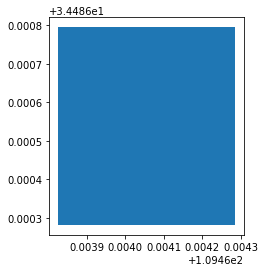

In [22]:
grid_day_all.plot()

<AxesSubplot:>

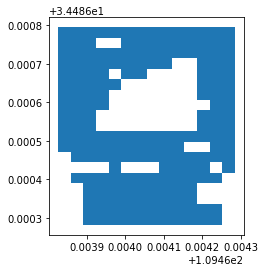

In [23]:
grid_day_inter.plot()

In [24]:
grid_day_inter.head()

,geometry
7,"POLYGON ((109.46383 34.48647, 109.46386 34.486..."
8,"POLYGON ((109.46383 34.48650, 109.46386 34.486..."
9,"POLYGON ((109.46383 34.48652, 109.46386 34.486..."
10,"POLYGON ((109.46383 34.48655, 109.46386 34.486..."
11,"POLYGON ((109.46383 34.48658, 109.46386 34.486..."


In [25]:
len(grid_day_inter)

191

In [26]:
daydata = grid_day[2]

In [27]:
grids_day = sampling.grid(daydata)
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  7.807665824890137


In [28]:
len(grids_day)

191

In [29]:
grids_day[0].head()

,svid,time,Cn0DbHz,geometry,lon_id,lat_id,grid
1805,C06,2021-08-01 12:04:57,38.550568,POINT Z (109.46386 34.48648 381.00000),0,7,"(0, 7)"
1806,C14,2021-08-01 12:04:57,36.920021,POINT Z (109.46386 34.48648 381.00000),0,7,"(0, 7)"
1807,C16,2021-08-01 12:04:57,39.351913,POINT Z (109.46386 34.48648 381.00000),0,7,"(0, 7)"
1808,C25,2021-08-01 12:04:57,29.031887,POINT Z (109.46386 34.48648 381.00000),0,7,"(0, 7)"
1809,C26,2021-08-01 12:04:57,16.146212,POINT Z (109.46386 34.48648 381.00000),0,7,"(0, 7)"


In [30]:
#building ray observations by using gnssmapper
dayob = [0]*len(daydata['grid'].unique())
for i in range (len(daydata['grid'].unique())):
    dayob[i] = gm.observe(grids_day[i])

In [31]:
#height of building of each grid's data
dayheight = [0]*len(daydata['grid'].unique())
for i in range(len(daydata['grid'].unique())):
    dayheight[i] = gm.predict(mymap,dayob[i].sort_values(by='Cn0DbHz'))

In [32]:
len(dayheight)

191

In [33]:
#combine to form dataframe
dayheight = pd.DataFrame(pd.concat(dayheight[i] for i in range(len(daydata['grid'].unique()))))

In [34]:
dayheight=dayheight.reset_index()
dayheight.head()

,index,lower_bound,mid_point,upper_bound
0,0,392.065072,392.391668,392.718264
1,0,428.085824,428.963848,429.841871
2,0,406.853419,407.205114,407.556810
3,0,399.149112,399.505533,399.861953
4,0,431.897472,432.332609,432.767747


In [35]:
grid_day_inter = grid_day_inter.reset_index()
grid_day_inter.head()

,index,geometry
0,7,"POLYGON ((109.46383 34.48647, 109.46386 34.486..."
1,8,"POLYGON ((109.46383 34.48650, 109.46386 34.486..."
2,9,"POLYGON ((109.46383 34.48652, 109.46386 34.486..."
3,10,"POLYGON ((109.46383 34.48655, 109.46386 34.486..."
4,11,"POLYGON ((109.46383 34.48658, 109.46386 34.486..."


In [36]:
#add height columns
grid_day_inter['height_lower']=dayheight.lower_bound
grid_day_inter['height_mid']=dayheight.mid_point
grid_day_inter['height_upper']=dayheight.upper_bound

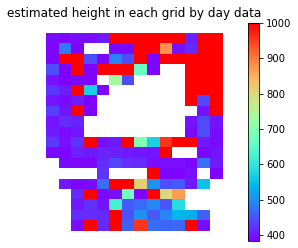

In [40]:
ax = grid_day_inter.plot(
    column='height_lower',# Data to plot
    cmap='rainbow',# Color palette
    legend=True)
plt.title('estimated height in each grid by day data')
ax.set_axis_off();
plt.savefig('daygrid_all.jpg')

### night data

                                            geometry
1  POLYGON ((109.46384 34.48632, 109.46387 34.486...
2  POLYGON ((109.46384 34.48635, 109.46387 34.486...
4  POLYGON ((109.46384 34.48640, 109.46387 34.486...
5  POLYGON ((109.46384 34.48643, 109.46387 34.486...
6  POLYGON ((109.46384 34.48646, 109.46387 34.486...
209
run time is:  9.484426021575928


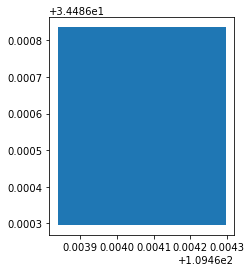

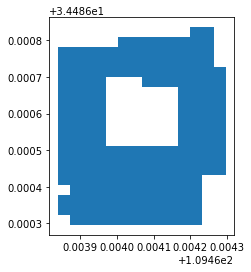

In [41]:
time_start=time.time()
night_lon_incre = sampling.grid_increment(nightdata,3)[0]
night_lat_incre = sampling.grid_increment(nightdata,3)[1]
grid_night = sampling.grid_create(nightdata,night_lon_incre,night_lat_incre)

#grid of all map from minimum to maximum of 
#longitude and latituide
grid_night_all = grid_night[0]
#grid that has intersection with gnss data
grid_night_inter = grid_night[1]
grid_night_all.plot()
grid_night_inter.plot()

print(grid_night_inter.head())
print(len(grid_night_inter))
nightdata = grid_night[2]

grids_night = sampling.grid(nightdata)
time_end=time.time()
print('run time is: ',time_end-time_start)

In [42]:
len(grids_night)

209

In [43]:
grids_night[0].head()

,svid,time,Cn0DbHz,geometry,lon_id,lat_id,grid
0,G01,2021-08-03 00:58:50,44.188309,POINT Z (109.46387 34.48634 381.00000),0,1,"(0, 1)"
1,C36,2021-08-03 00:58:50,30.289864,POINT Z (109.46387 34.48634 381.00000),0,1,"(0, 1)"
2,C33,2021-08-03 00:58:50,27.214245,POINT Z (109.46387 34.48634 381.00000),0,1,"(0, 1)"
3,C32,2021-08-03 00:58:50,36.816181,POINT Z (109.46387 34.48634 381.00000),0,1,"(0, 1)"
4,C30,2021-08-03 00:58:50,31.582380,POINT Z (109.46387 34.48634 381.00000),0,1,"(0, 1)"


In [44]:
#building ray observations by using gnssmapper
nightob = [0]*len(nightdata['grid'].unique())
for i in range (len(nightdata['grid'].unique())):
    nightob[i] = gm.observe(grids_night[i])

In [45]:
#height of building of each grid's data
nightheight = [0]*len(nightdata['grid'].unique())
for i in range(len(nightdata['grid'].unique())):
    nightheight[i] = gm.predict(mymap,nightob[i].sort_values(by='Cn0DbHz'))

In [47]:
len(nightheight)
#combine to form dataframe
nightheight = pd.DataFrame(pd.concat(nightheight[i] for i in range(len(nightdata['grid'].unique()))))

In [48]:
nightheight=nightheight.reset_index()
nightheight.head()

,index,lower_bound,mid_point,upper_bound
0,0,384.668112,384.916117,385.164121
1,0,406.672695,407.816594,408.960492
2,0,399.002414,399.342909,399.683403
3,0,411.485688,411.710558,411.935428
4,0,415.805952,417.567862,419.329771


In [49]:
grid_night_inter = grid_night_inter.reset_index()
grid_night_inter.head()

,index,geometry
0,1,"POLYGON ((109.46384 34.48632, 109.46387 34.486..."
1,2,"POLYGON ((109.46384 34.48635, 109.46387 34.486..."
2,4,"POLYGON ((109.46384 34.48640, 109.46387 34.486..."
3,5,"POLYGON ((109.46384 34.48643, 109.46387 34.486..."
4,6,"POLYGON ((109.46384 34.48646, 109.46387 34.486..."


In [50]:
len(nightheight)

209

In [51]:
#add height columns
grid_night_inter['height_lower']=nightheight.lower_bound
grid_night_inter['height_mid']=nightheight.mid_point
grid_night_inter['height_upper']=nightheight.upper_bound

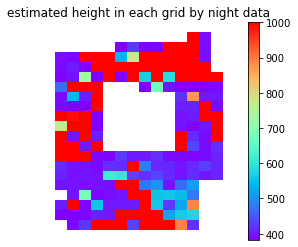

In [53]:
ax = grid_night_inter.plot(
    column='height_lower',# Data to plot
    cmap='rainbow',# Color palette
    legend=True)
plt.title('estimated height in each grid by night data')
ax.set_axis_off();
plt.savefig('nightgrid_all.jpg')

## all data

In [67]:
grid_night_inter

,index,geometry,height_lower,height_mid,height_upper
0,1,"POLYGON ((109.46384 34.48632, 109.46387 34.486...",384.668112,384.916117,385.164121
1,2,"POLYGON ((109.46384 34.48635, 109.46387 34.486...",406.672695,407.816594,408.960492
2,4,"POLYGON ((109.46384 34.48640, 109.46387 34.486...",399.002414,399.342909,399.683403
3,5,"POLYGON ((109.46384 34.48643, 109.46387 34.486...",411.485688,411.710558,411.935428
4,6,"POLYGON ((109.46384 34.48646, 109.46387 34.486...",415.805952,417.567862,419.329771
...,...,...,...,...,...
204,271,"POLYGON ((109.46426 34.48659, 109.46430 34.486...",1000.000000,2454.780385,3909.560770
205,272,"POLYGON ((109.46426 34.48662, 109.46430 34.486...",391.419546,391.434546,391.449546
206,273,"POLYGON ((109.46426 34.48665, 109.46430 34.486...",400.731394,401.042529,401.353665
207,274,"POLYGON ((109.46426 34.48667, 109.46430 34.486...",391.637469,391.876920,392.116371


In [68]:
grid_day_inter

,index,geometry,height_lower,height_mid,height_upper
0,7,"POLYGON ((109.46383 34.48647, 109.46386 34.486...",392.065072,392.391668,392.718264
1,8,"POLYGON ((109.46383 34.48650, 109.46386 34.486...",428.085824,428.963848,429.841871
2,9,"POLYGON ((109.46383 34.48652, 109.46386 34.486...",406.853419,407.205114,407.556810
3,10,"POLYGON ((109.46383 34.48655, 109.46386 34.486...",399.149112,399.505533,399.861953
4,11,"POLYGON ((109.46383 34.48658, 109.46386 34.486...",431.897472,432.332609,432.767747
...,...,...,...,...,...
186,261,"POLYGON ((109.46425 34.48666, 109.46428 34.486...",1000.000000,1052.693897,1105.387795
187,262,"POLYGON ((109.46425 34.48669, 109.46428 34.486...",1000.000000,1052.109837,1104.219674
188,263,"POLYGON ((109.46425 34.48671, 109.46428 34.486...",1000.000000,1052.436313,1104.872626
189,264,"POLYGON ((109.46425 34.48674, 109.46428 34.486...",1000.000000,1052.554705,1105.109410


In [87]:
nightgridlist = []
for i in range (209):
    nightgridlist.append(grid_night_inter.iloc[i].geometry)

In [88]:
daygridlist = []
for i in range(191):
    if grid_day_inter.geometry.iloc[i] in nightgridlist:
        daygridlist.append(grid_day_inter)

In [89]:
daygridlist

[]

## here just consider day data and night data since grids do not overlap

In [91]:
daydata

,svid,time,Cn0DbHz,geometry,lon_id,lat_id,grid
0,G10,2021-08-01 11:51:17,42.878216,POINT Z (109.46416 34.48673 381.00000),10,16,"(10, 16)"
3,R08,2021-08-01 11:51:17,38.790283,POINT Z (109.46416 34.48673 381.00000),10,16,"(10, 16)"
4,R07,2021-08-01 11:51:17,37.847214,POINT Z (109.46416 34.48673 381.00000),10,16,"(10, 16)"
5,R16,2021-08-01 11:51:17,26.089874,POINT Z (109.46416 34.48673 381.00000),10,16,"(10, 16)"
6,R09,2021-08-01 11:51:17,34.727238,POINT Z (109.46416 34.48673 381.00000),10,16,"(10, 16)"
...,...,...,...,...,...,...,...
722,G12,2021-08-01 12:25:49,43.104897,POINT Z (109.46419 34.48628 381.00000),10,0,"(10, 0)"
723,G10,2021-08-01 12:25:49,43.186081,POINT Z (109.46419 34.48628 381.00000),10,0,"(10, 0)"
724,C27,2021-08-01 12:25:49,26.079788,POINT Z (109.46419 34.48628 381.00000),10,0,"(10, 0)"
725,R16,2021-08-01 12:25:49,40.535389,POINT Z (109.46419 34.48628 381.00000),10,0,"(10, 0)"


In [92]:
obday = gm.observe(daydata)
heightday = gm.predict(mymap,obday)

In [95]:
nightdata

,svid,time,Cn0DbHz,geometry,lon_id,lat_id,grid
0,G01,2021-08-03 00:27:07,21.181335,POINT Z (109.46418 34.48666 381.00000),10,13,"(10, 13)"
4,R03,2021-08-03 00:27:07,24.641365,POINT Z (109.46418 34.48666 381.00000),10,13,"(10, 13)"
5,R19,2021-08-03 00:27:07,31.255043,POINT Z (109.46418 34.48666 381.00000),10,13,"(10, 13)"
6,R16,2021-08-03 00:27:07,17.234669,POINT Z (109.46418 34.48666 381.00000),10,13,"(10, 13)"
7,R09,2021-08-03 00:27:07,37.303123,POINT Z (109.46418 34.48666 381.00000),10,13,"(10, 13)"
...,...,...,...,...,...,...,...
934,G02,2021-08-03 01:00:09,7.000000,POINT Z (109.46388 34.48631 381.00000),1,0,"(1, 0)"
935,G01,2021-08-03 01:00:09,36.974091,POINT Z (109.46388 34.48631 381.00000),1,0,"(1, 0)"
936,C33,2021-08-03 01:00:09,20.613083,POINT Z (109.46388 34.48631 381.00000),1,0,"(1, 0)"
937,R02,2021-08-03 01:00:09,21.990143,POINT Z (109.46388 34.48631 381.00000),1,0,"(1, 0)"


In [96]:
obnight = gm.observe(nightdata)
heightnight = gm.predict(mymap,obnight)

### result after remove on day data

In [159]:
#add new columns of grid id
list_grid = list(daydata['grid'].unique())
list_grid = pd.Series(list_grid,name = 'grids')
grid_day_inter['grids'] = list_grid

In [160]:
daydatalist = []
dayoblist = []
dayhlist = []
grid_day_interlist = []
grids_list_list = []
for i in range(500,1200,100):
    grid_day_interlist.append(grid_day_inter[grid_day_inter['height_lower']<i])

In [161]:
for i in range(7):
    grids_list_list.append(grid_day_interlist[i]['grids'].unique())
    daydatalist.append(daydata[daydata['grid'].isin(grids_list_list[i])])

In [162]:
dayoblist = []
dayheightlist = []
for i in range(7):
    dayoblist.append(gm.observe(daydatalist[i]))
    dayheightlist.append(gm.predict(mymap,dayoblist[i].sort_values(by='Cn0DbHz')))

In [163]:
dayheightlist = sampling.combine_height(dayheightlist)

In [164]:
dayheightlist

,lower_bound,mid_point,upper_bound
0,545.631884,550.482414,555.332943
1,516.582022,517.371335,518.160648
2,511.083543,512.252742,513.421940
3,517.393543,518.578296,519.763049
4,559.624637,569.078282,578.531927
5,539.073788,545.275131,551.476475
6,539.073788,545.275131,551.476475


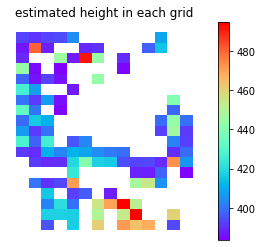

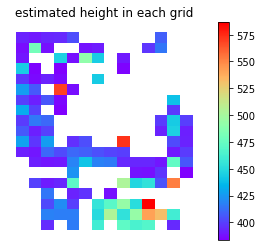

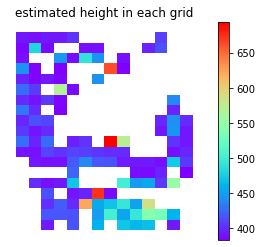

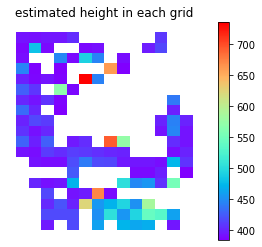

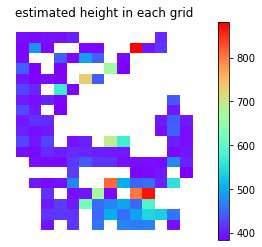

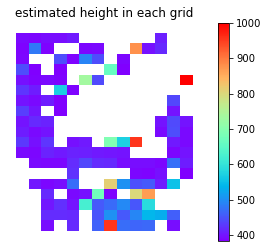

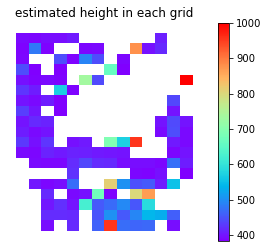

In [165]:
for i in range(7):
    ax = grid_day_interlist[i].plot(
    column='height_lower',# Data to plot
    cmap='rainbow',# Color palette
    legend=True,# Add legend
)
    plt.title('estimated height in each grid')
    ax.set_axis_off();

### result after remove on night data

In [166]:
#add new columns of grid id
time_start=time.time()
list_grid = list(nightdata['grid'].unique())
list_grid = pd.Series(list_grid,name = 'grids')
grid_night_inter['grids'] = list_grid

nightdatalist = []
nightoblist = []
nighthlist = []
grid_night_interlist = []
grids_list_list = []

for i in range(500,1200,100):
    grid_night_interlist.append(grid_night_inter[grid_night_inter['height_lower']<i])

for i in range(7):
    grids_list_list.append(grid_night_interlist[i]['grids'].unique())
    nightdatalist.append(nightdata[nightdata['grid'].isin(grids_list_list[i])])
time_end=time.time()
print('run time is: ',time_end-time_start)

nightoblist = []
nightheightlist = []
for i in range(7):
    nightoblist.append(gm.observe(nightdatalist[i]))
    nightheightlist.append(gm.predict(mymap,nightoblist[i].sort_values(by='Cn0DbHz')))

run time is:  0.3155338764190674


In [167]:
nightheightlist = sampling.combine_height(nightheightlist)

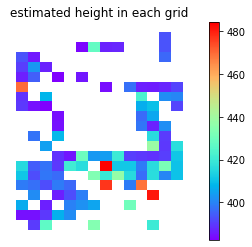

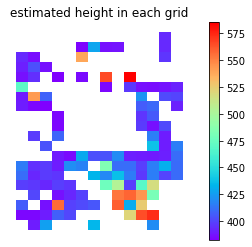

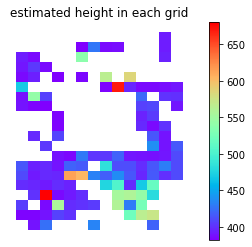

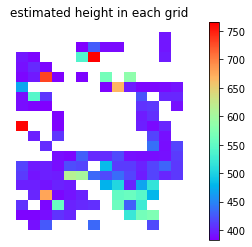

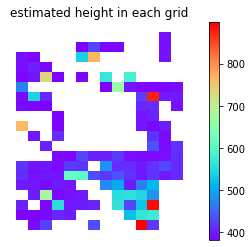

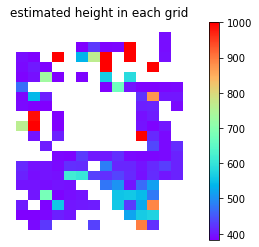

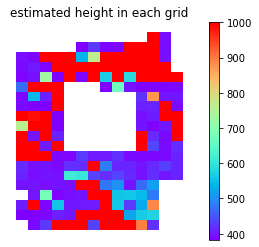

In [168]:
for i in range(7):
    ax = grid_night_interlist[i].plot(
    column='height_lower',# Data to plot
    cmap='rainbow',# Color palette
    legend=True,# Add legend
)
    plt.title('estimated height in each grid')
    ax.set_axis_off();

In [169]:
nightheightlist

,lower_bound,mid_point,upper_bound
0,402.300237,402.317527,402.334816
1,579.015149,581.697057,584.378964
2,462.567549,462.742563,462.917577
3,555.138512,557.724113,560.309714
4,581.759517,585.580832,589.402148
5,603.045003,613.835332,624.625660
6,463.735036,464.042199,464.349363


In [170]:
bounds = [i for i in range(500,1200,100)]
bounds

[500, 600, 700, 800, 900, 1000, 1100]

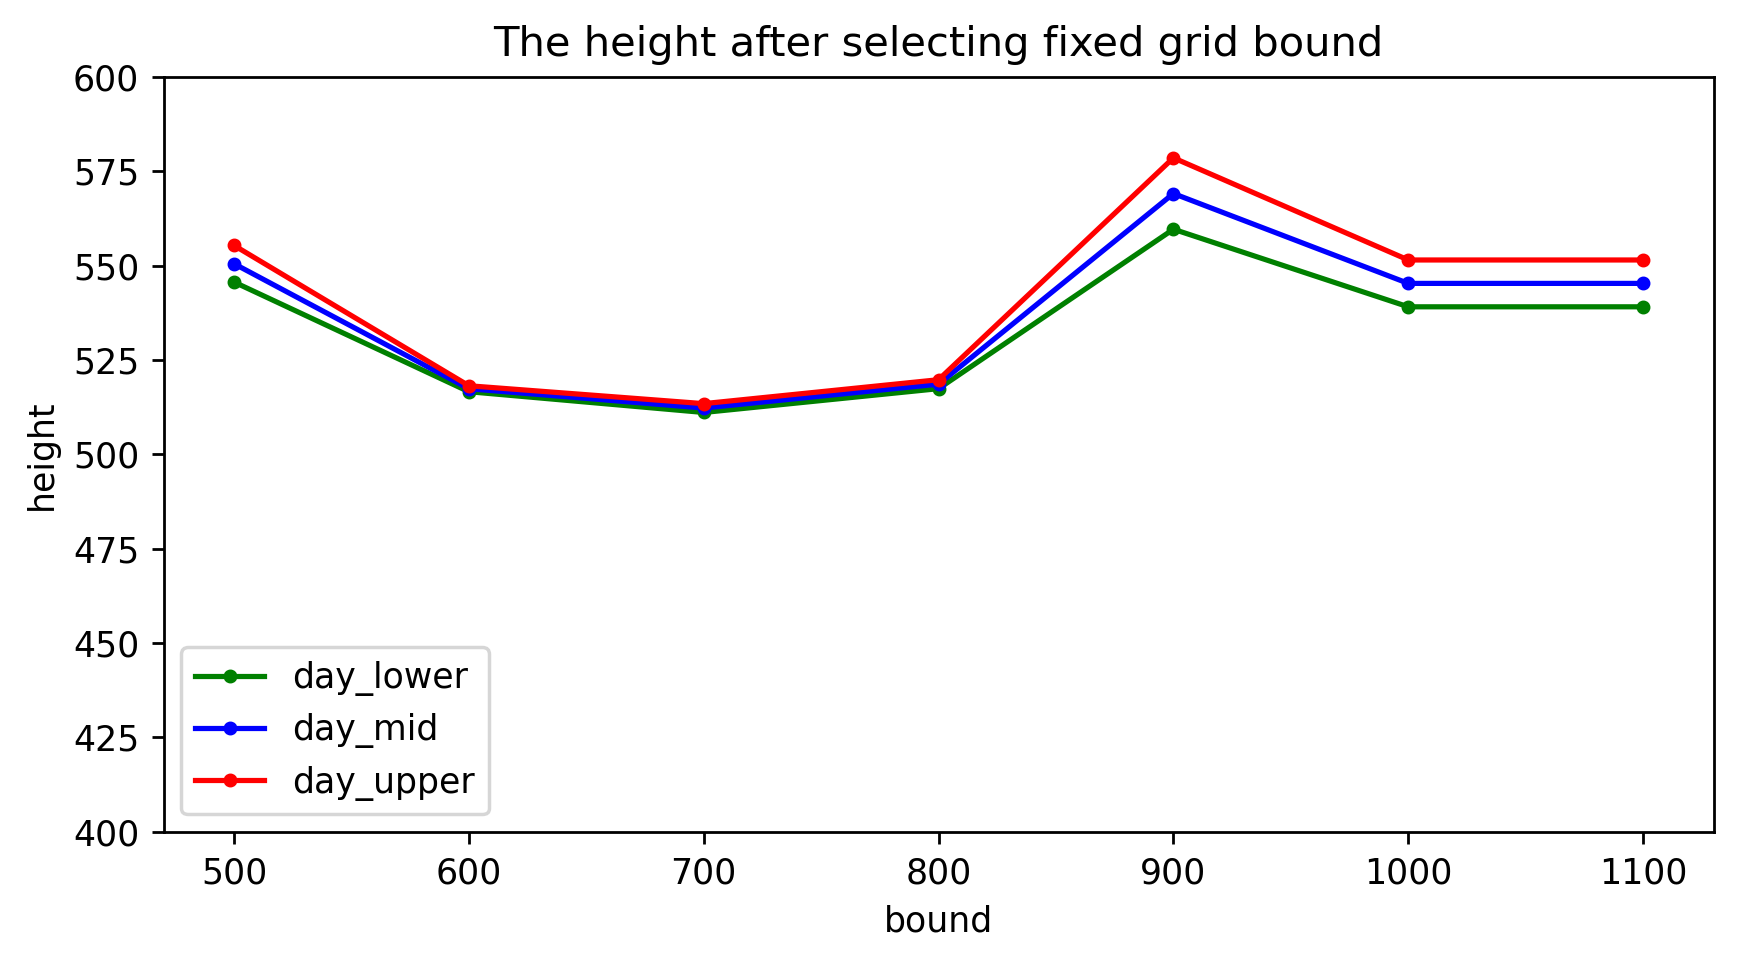

In [179]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax = plt.subplot(111)
plt.sca(ax)

plt.plot(bounds,dayheightlist['lower_bound'],color='g',marker = '.',label='day_lower')
plt.plot(bounds,dayheightlist['mid_point'],color='b',marker = '.',label='day_mid')
plt.plot(bounds,dayheightlist['upper_bound'],color='r',marker = '.',label='day_upper')
plt.ylim(400,600)

plt.title('The height after selecting fixed grid bound')
plt.ylabel('height')
plt.xlabel('bound')
plt.legend()
plt.savefig('grid_day_analysis.jpg')
plt.show()

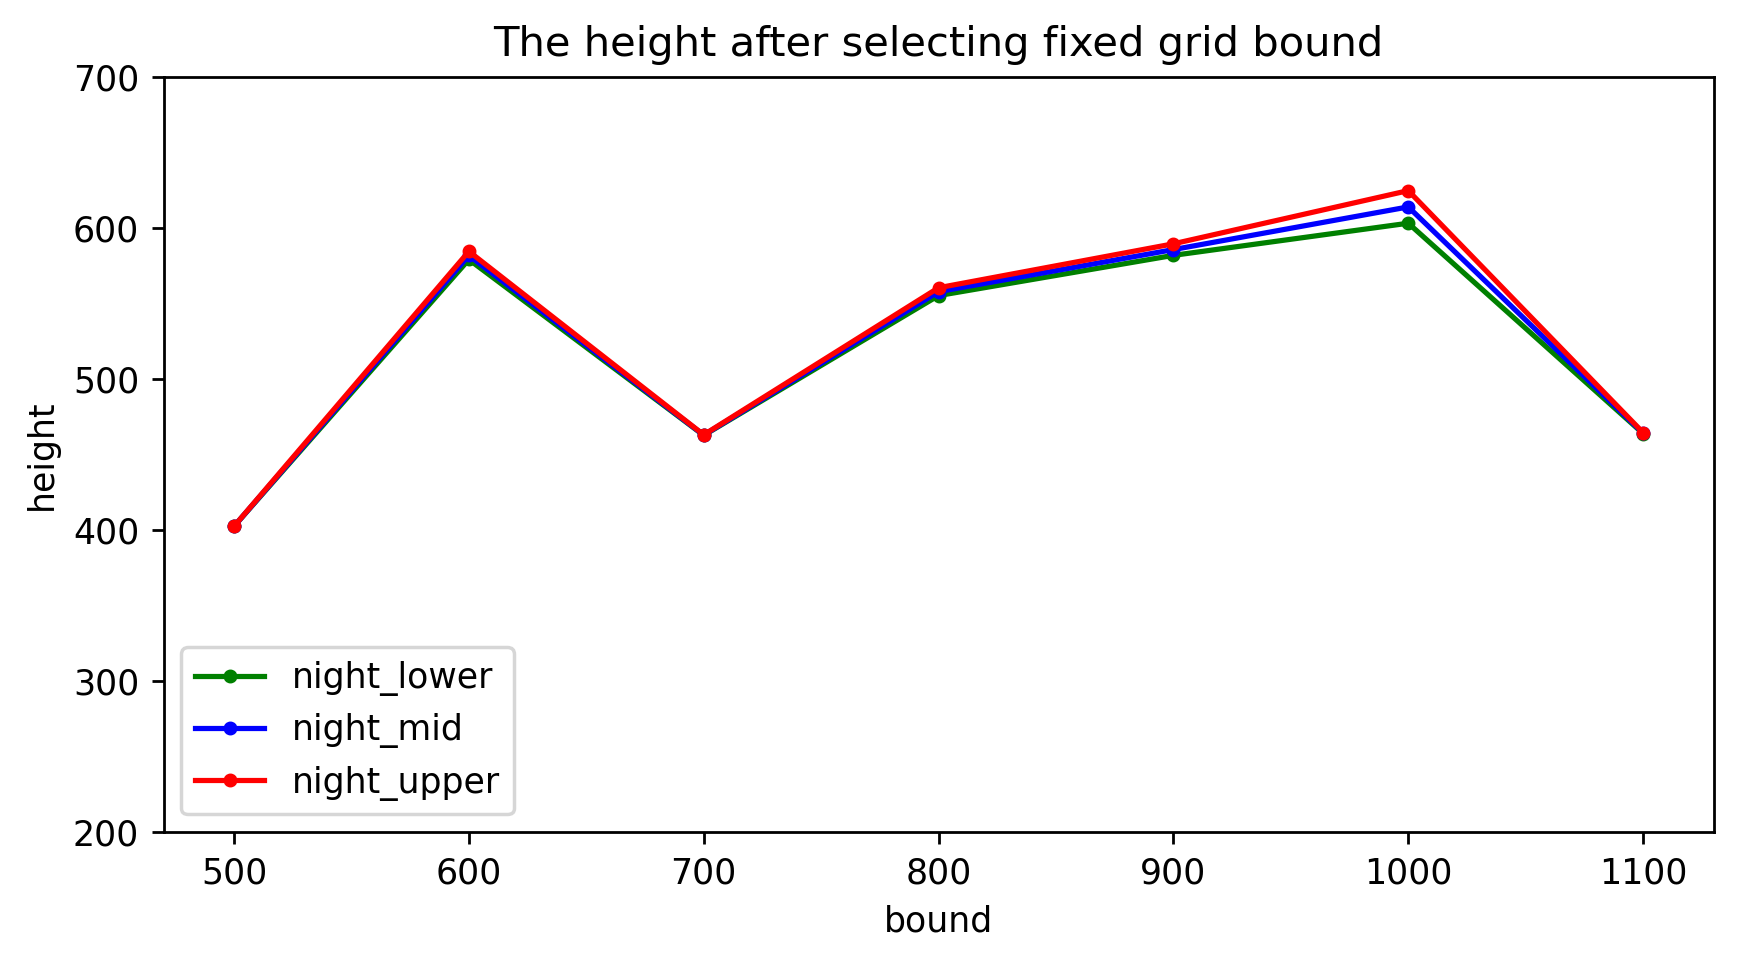

In [183]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax = plt.subplot(111)
plt.sca(ax)

plt.plot(bounds,nightheightlist['lower_bound'],color='g',marker = '.',label='night_lower')
plt.plot(bounds,nightheightlist['mid_point'],color='b',marker = '.',label='night_mid')
plt.plot(bounds,nightheightlist['upper_bound'],color='r',marker = '.',label='night_upper')
plt.ylim(200,700)

plt.title('The height after selecting fixed grid bound')
plt.ylabel('height')
plt.xlabel('bound')
plt.legend()
plt.savefig('grid_night_analysis.jpg')
plt.show()

### increase the width of grid to consider all data

In [219]:
data_all = data_all[['svid','time','Cn0DbHz','geometry']]

In [220]:
data_all

,svid,time,Cn0DbHz,geometry
0,G10,2021-08-01 11:51:17,42.878216,POINT Z (109.46416 34.48673 381.00000)
3,R08,2021-08-01 11:51:17,38.790283,POINT Z (109.46416 34.48673 381.00000)
4,R07,2021-08-01 11:51:17,37.847214,POINT Z (109.46416 34.48673 381.00000)
5,R16,2021-08-01 11:51:17,26.089874,POINT Z (109.46416 34.48673 381.00000)
6,R09,2021-08-01 11:51:17,34.727238,POINT Z (109.46416 34.48673 381.00000)
...,...,...,...,...
934,G02,2021-08-03 01:00:09,7.000000,POINT Z (109.46388 34.48631 381.00000)
935,G01,2021-08-03 01:00:09,36.974091,POINT Z (109.46388 34.48631 381.00000)
936,C33,2021-08-03 01:00:09,20.613083,POINT Z (109.46388 34.48631 381.00000)
937,R02,2021-08-03 01:00:09,21.990143,POINT Z (109.46388 34.48631 381.00000)


                                            geometry
0  POLYGON ((109.46383 34.48628, 109.46399 34.486...
1  POLYGON ((109.46383 34.48642, 109.46399 34.486...
2  POLYGON ((109.46383 34.48655, 109.46399 34.486...
3  POLYGON ((109.46383 34.48669, 109.46399 34.486...
5  POLYGON ((109.46399 34.48628, 109.46415 34.486...
13
run time is:  12.736618041992188


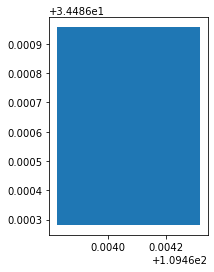

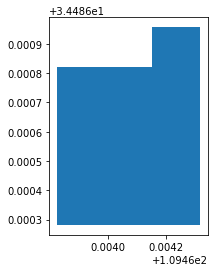

In [221]:
time_start=time.time()
all_lon_incre = sampling.grid_increment(data_all,15)[0]
all_lat_incre = sampling.grid_increment(data_all,15)[1]
grid_all = sampling.grid_create(data_all,all_lon_incre,all_lat_incre)

#grid of all map from minimum to maximum of 
#longitude and latituide
grid_all_all = grid_all[0]
#grid that has intersection with gnss data
grid_all_inter = grid_all[1]
grid_all_all.plot()
grid_all_inter.plot()

print(grid_all_inter.head())
print(len(grid_all_inter))
data_all = grid_all[2]

grids_all = sampling.grid(data_all)
time_end=time.time()
print('run time is: ',time_end-time_start)

In [222]:
len(grids_all)

13

In [223]:
grids_all[0].head()

,svid,time,Cn0DbHz,geometry,lon_id,lat_id,grid
527,R08,2021-08-01 12:15:36,35.310471,POINT Z (109.46399 34.48642 381.00000),0,0,"(0, 0)"
530,C06,2021-08-01 12:15:36,32.161423,POINT Z (109.46399 34.48642 381.00000),0,0,"(0, 0)"
531,C14,2021-08-01 12:15:36,26.220892,POINT Z (109.46399 34.48642 381.00000),0,0,"(0, 0)"
532,C24,2021-08-01 12:15:36,29.278225,POINT Z (109.46399 34.48642 381.00000),0,0,"(0, 0)"
533,C25,2021-08-01 12:15:36,43.416191,POINT Z (109.46399 34.48642 381.00000),0,0,"(0, 0)"


In [224]:
#divide all data to day and night
grids_day = [0]*13
grids_night = [0]*13
for i in range(13):
    grids_all[i]['day'] = grids_all[i]['time'].apply(lambda r:r.day)
    grids_day[i] = grids_all[i][grids_all[i]['day']==1]
    grids_night[i] = grids_all[i][grids_all[i]['day']==3]

In [243]:
#check if there are empty values
day_empty = []
for i in range(13):
    if grids_day[i].empty:
        day_empty.append(i)

In [244]:
#check if there are empty values
night_empty = []
for i in range(13):
    if grids_night[i].empty:
        night_empty.append(i)

In [245]:
day_empty

[12]

In [246]:
night_empty

[6]

In [247]:
#create observations
ob_grid_day = [0]*13
for i in range(12):
    ob_grid_day[i] = gm.observe(grids_day[i])

In [248]:
ob_grid_night = [0]*13
for i in range(6):
    ob_grid_night[i] = gm.observe(grids_night[i])
for i in range(7,13):
    ob_grid_night[i] = gm.observe(grids_night[i])

In [249]:
ob_grid = [0]*13
for i in range(6):
    ob_grid[i] = pd.concat([ob_grid_day[i],ob_grid_night[i]])
ob_grid[6] = ob_grid_day[6]
for i in range(7,12):
    ob_grid[i] = pd.concat([ob_grid_day[i],ob_grid_night[i]])
ob_grid[12] = ob_grid_night[12]

In [250]:
grid_height = [0]*13
for i in range(0,13):
    grid_height[i] = gm.predict(mymap,ob_grid[i].sort_values(by = 'Cn0DbHz'))

In [251]:
len(grid_height)
#combine to form dataframe
grid_height = pd.DataFrame(pd.concat(grid_height[i] for i in range(len(data_all['grid'].unique()))))

In [252]:
grid_height=grid_height.reset_index()
grid_height.head()
grid_all_inter = grid_all_inter.reset_index()
grid_all_inter.head()

,index,geometry
0,0,"POLYGON ((109.46383 34.48628, 109.46399 34.486..."
1,1,"POLYGON ((109.46383 34.48642, 109.46399 34.486..."
2,2,"POLYGON ((109.46383 34.48655, 109.46399 34.486..."
3,3,"POLYGON ((109.46383 34.48669, 109.46399 34.486..."
4,5,"POLYGON ((109.46399 34.48628, 109.46415 34.486..."


In [253]:
len(grid_height)

13

In [254]:
#add height columns
grid_all_inter['height_lower']=grid_height.lower_bound
grid_all_inter['height_mid']=grid_height.mid_point
grid_all_inter['height_upper']=grid_height.upper_bound

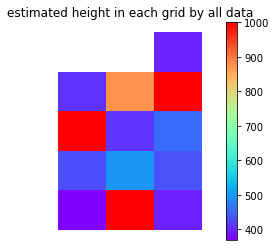

In [256]:
ax = grid_all_inter.plot(
    column='height_lower',# Data to plot
    cmap='rainbow',# Color palette
    legend=True)
plt.title('estimated height in each grid by all data')
ax.set_axis_off();
plt.savefig('allgrid_all.jpg')

In [257]:
list_grid = list(data_all['grid'].unique())
list_grid = pd.Series(list_grid,name = 'grids')
grid_all_inter['grids'] = list_grid

In [258]:
alldatalist = []
alloblist = []
allhlist = []
grid_all_interlist = []
grids_list_list = []

for i in range(500,1200,100):
    grid_all_interlist.append(grid_all_inter[grid_all_inter['height_lower']<i])

In [260]:
for i in range(7):
    grids_list_list.append(grid_all_interlist[i]['grids'].unique())
    alldatalist.append(data_all[data_all['grid'].isin(grids_list_list[i])])

In [261]:
grids_day = [0]*7
grids_night = [0]*7
for i in range(7):
    alldatalist[i]['day'] = alldatalist[i]['time'].apply(lambda r:r.day)
    grids_day[i] = alldatalist[i][alldatalist[i]['day']==1]
    grids_night[i] = alldatalist[i][alldatalist[i]['day']==3]

In [278]:
day_empty = []
for i in range(7):
    if grids_day[i].empty:
        day_empty.append(i)

In [279]:
day_empty

[]

In [280]:
night_empty = []
for i in range(7):
    if grids_night[i].empty:
        night_empty.append(i)

In [281]:
night_empty

[]

In [282]:
ob_grid_day = [0]*7
for i in range(7):
    ob_grid_day[i] = gm.observe(grids_day[i])

In [283]:
ob_grid_night = [0]*7
for i in range(7):
    ob_grid_night[i] = gm.observe(grids_night[i])

In [284]:
ob_grid_all = [0]*7
for i in range(7):
    ob_grid_all[i] = pd.concat([ob_grid_day[i],ob_grid_night[i]])

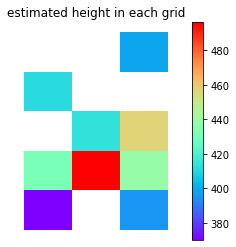

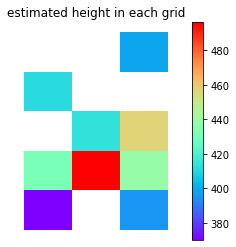

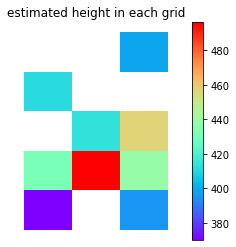

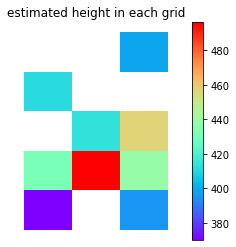

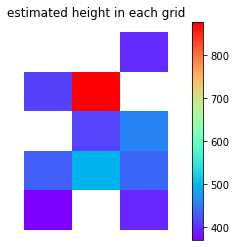

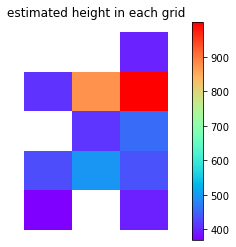

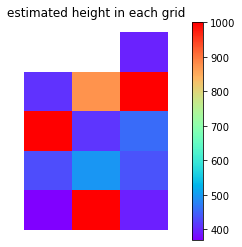

In [285]:
for i in range(7):
    ax = grid_all_interlist[i].plot(
    column='height_lower',# Data to plot
    cmap='rainbow',# Color palette
    legend=True,# Add legend
)
    plt.title('estimated height in each grid')
    ax.set_axis_off();

In [287]:
allheight = [0]*7
for i in range(7):
    allheight[i] = gm.predict(mymap,ob_grid_all[i].sort_values(by='Cn0DbHz'))

In [288]:
allheight = sampling.combine_height(allheight)

In [289]:
allheight

,lower_bound,mid_point,upper_bound
0,548.523386,550.233279,551.943171
1,548.523386,550.233279,551.943171
2,548.523386,550.233279,551.943171
3,548.523386,550.233279,551.943171
4,548.523386,550.233279,551.943171
5,448.780035,448.925280,449.070524
6,511.027750,511.600543,512.173337


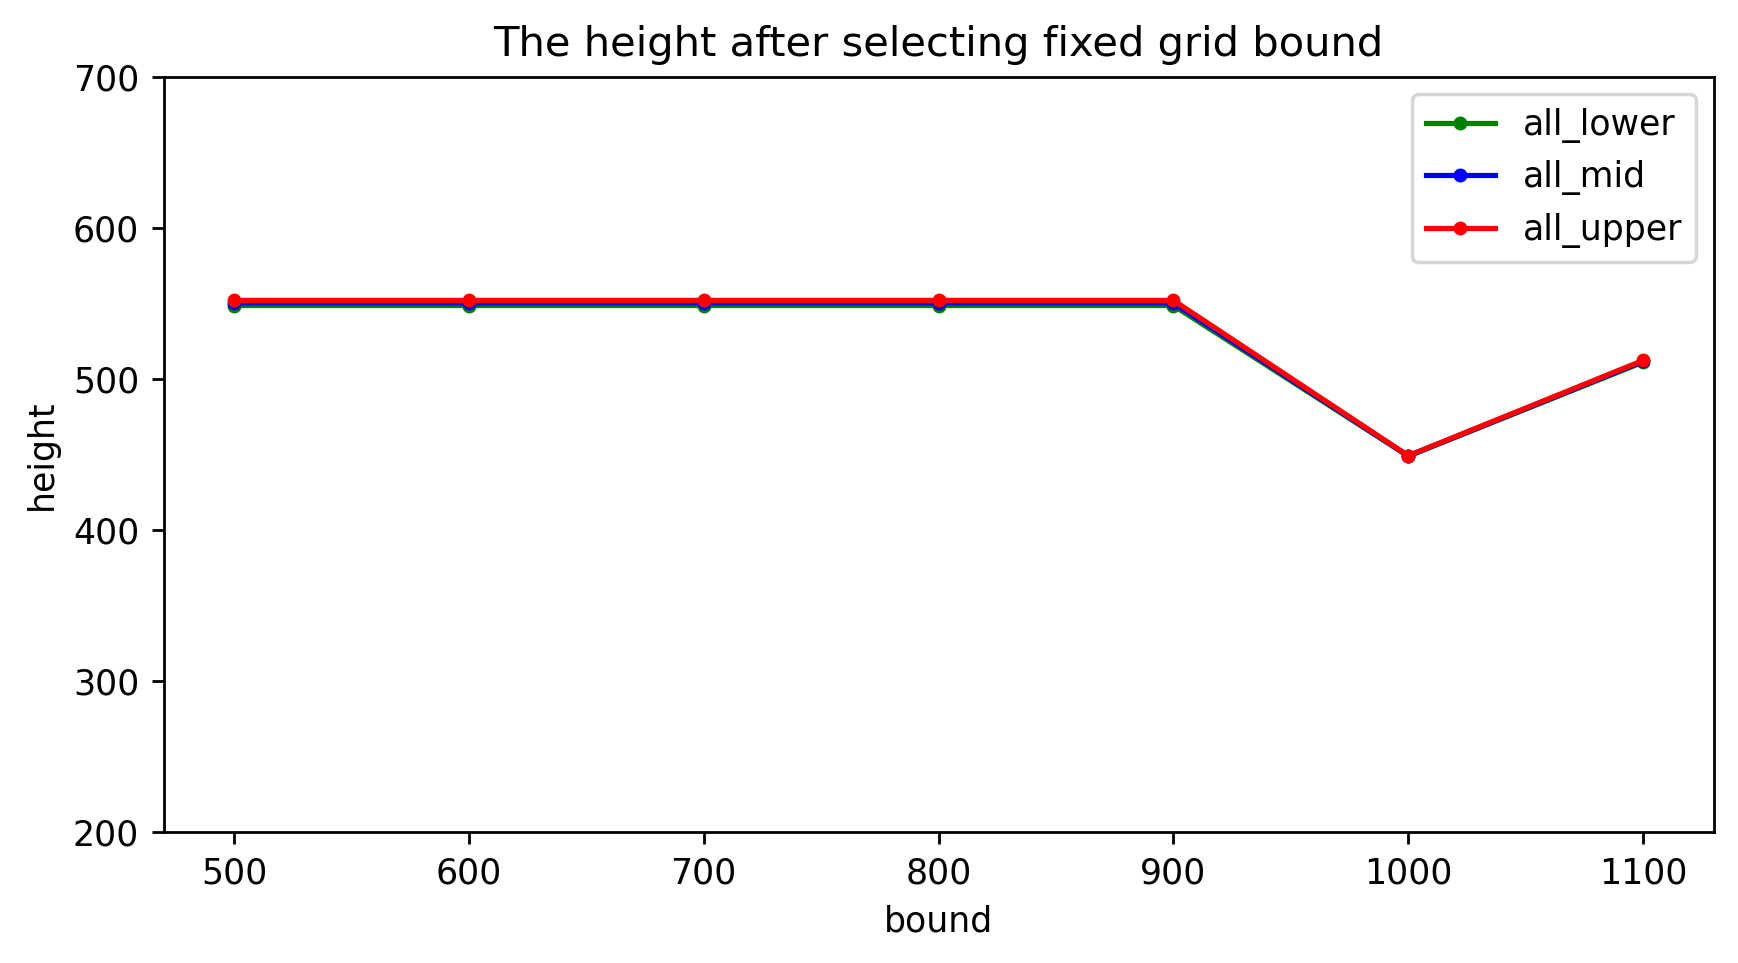

In [292]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax = plt.subplot(111)
plt.sca(ax)

plt.plot(bounds,allheight['lower_bound'],color='g',marker = '.',label='all_lower')
plt.plot(bounds,allheight['mid_point'],color='b',marker = '.',label='all_mid')
plt.plot(bounds,allheight['upper_bound'],color='r',marker = '.',label='all_upper')
plt.ylim(200,700)

plt.title('The height after selecting fixed grid bound')
plt.ylabel('height')
plt.xlabel('bound')
plt.legend()
plt.savefig('grid_all_analysis.jpg')
plt.show()